In [48]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
       
        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))

            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


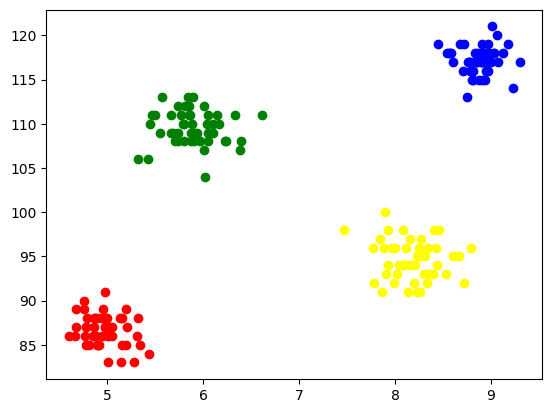

In [61]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('student_clustering.csv')
X = df.iloc[:,:].values

km = KMeans(n_clusters=4,max_iter=10)
y_means = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

In [57]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[29957.898288,
 4184.14127,
 2362.7133490000006,
 681.96966,
 514.1616803171114,
 412.2287691506906,
 302.5473746759043,
 234.4868734319922,
 203.4709685937251,
 183.5031229563492]

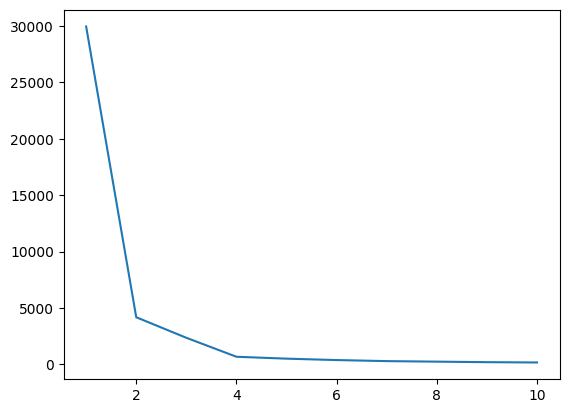

In [51]:
plt.plot(range(1,11),wcss)

In [52]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)
y_means

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 2, 2, 3, 3, 2, 1, 3, 2, 0, 3, 2, 0, 3, 2, 3, 2, 3, 3, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 0, 3, 0, 2, 2, 0,
       1, 1, 2, 3, 1, 3, 0, 0, 1, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 0, 1,
       2, 0, 3, 2, 3, 1, 2, 0, 3, 1, 3, 1, 0, 2, 2, 1, 3, 0, 1, 0, 1, 3,
       1, 3, 1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 0, 2, 0, 1, 1,
       2, 1, 3, 3, 2, 1, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 2, 3, 0, 2, 2, 3,
       0, 0, 3, 1, 3, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1,
       0, 2, 3, 1, 3, 2, 0, 1, 3, 2, 1, 0, 3, 0, 0, 1, 1, 3, 1, 0, 0, 2,
       1, 3, 0, 1, 1, 3, 3, 3, 2, 0, 2, 2, 1, 3, 2, 2, 0, 0, 2, 0, 1, 3,
       3, 1], dtype=int32)

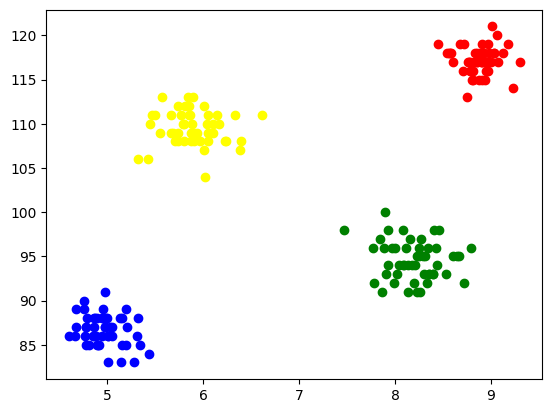

In [53]:
X[y_means == 3,1]
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')